In [133]:
# Calculadora de NDF
import numpy as np
from datetime import datetime

notional = 1000000
pre = 0.15
cupom = 0.05
spot = 5.75
data_ref = '2025-02-19'
vencimento = '2026-02-19'

brazil_holidays = [
    "2025-01-01",  # Confraternização Universal
    "2025-03-03",  # Carnaval (ponto facultativo)
    "2025-03-04",  # Carnaval (ponto facultativo)
    "2025-04-18",  # Sexta-feira Santa
    "2025-04-21",  # Tiradentes
    "2025-05-01",  # Dia do Trabalho
    "2025-06-19",  # Corpus Christi (ponto facultativo)
    "2025-09-07",  # Independência do Brasil
    "2025-10-12",  # Nossa Senhora Aparecida
    "2025-11-02",  # Finados
    "2025-11-15",  # Proclamação da República
    "2025-12-25",  # Natal

    "2026-01-01",  # Confraternização Universal
    "2026-02-16",  # Carnaval (ponto facultativo)
    "2026-02-17",  # Carnaval (ponto facultativo)
    "2026-04-03",  # Sexta-feira Santa
    "2026-04-21",  # Tiradentes
    "2026-05-01",  # Dia do Trabalho
    "2026-06-04",  # Corpus Christi (ponto facultativo)
    "2026-09-07",  # Independência do Brasil
    "2026-10-12",  # Nossa Senhora Aparecida
    "2026-11-02",  # Finados
    "2026-11-15",  # Proclamação da República
    "2026-12-25",  # Natal
]


def business_days_diff(start_date, end_date):

    start_str = np.datetime64(start_date)  # Converte para formato compatível
    end_str = np.datetime64(end_date)
    return np.busday_count(start_str, end_str,holidays=brazil_holidays)


def diferenca_dias(data1: str, data2: str, formato: str = "%Y-%m-%d") -> int:
    d1 = datetime.strptime(data1, formato)
    d2 = datetime.strptime(data2, formato)
    return abs((d2 - d1).days)

ndu = business_days_diff(data_ref,vencimento)
print('ndu :',ndu)
ndc = diferenca_dias(data_ref,vencimento)
print('ndc :',ndc)

fwd = spot * ((1+pre)**(ndu/252)) / (1+cupom*ndc/360)
fwd = fwd * 0.98
print('fwd :',fwd)

#Ajuste


ndu : 251
ndc : 365
fwd : 6.164167911547198


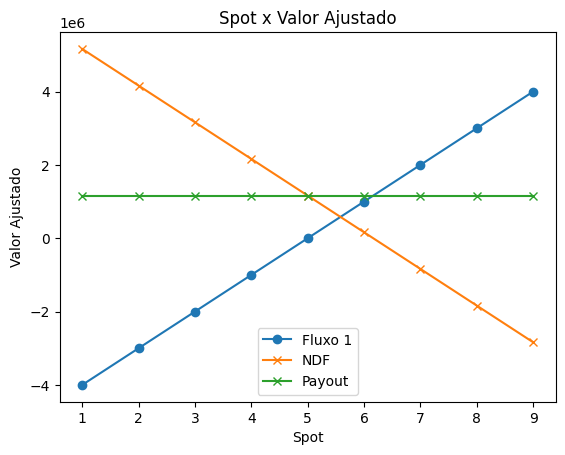

In [137]:
# o cliente vai receber $1M daqui um ano, mas as suas contas são em BRL. Que no total são de 5M

valores_recebidos = []
spots_vencimento = []

for spot_vencimento in range(1,10):
    valor_recebido = notional * (spot_vencimento - 5)
    valores_recebidos.append(valor_recebido)
    spots_vencimento.append(spot_vencimento)

import matplotlib.pyplot as plt

# Dados fornecidos
data = {
    'spot_vencimento': spots_vencimento,
    'valor_recebido': valores_recebidos
}

valores_recebidos_ndf = []
spots_vencimento_ndf = []

for spot_vencimento_ndf in range(1,10):
    valor_recebido_ndf = notional * (fwd - spot_vencimento_ndf) 
    valores_recebidos_ndf.append(valor_recebido_ndf)
    spots_vencimento_ndf.append(spot_vencimento_ndf)

data_ndf = {
    'spot_vencimento_ndf': spots_vencimento_ndf,
    'valor_recebido_ndf': valores_recebidos_ndf
}

# Criando o gráfico para o primeiro conjunto de dados
plt.plot(data['spot_vencimento'], data['valor_recebido'], marker='o', label='Fluxo 1')

# Criando o gráfico para o segundo conjunto de dados
plt.plot(data_ndf['spot_vencimento_ndf'], data_ndf['valor_recebido_ndf'], marker='x', label='NDF')

plt.plot(data_ndf['spot_vencimento_ndf'], np.array(data['valor_recebido'])+np.array(data_ndf['valor_recebido_ndf']), marker='x', label='Payout')


# Adicionando título e rótulos aos eixos
plt.title('Spot x Valor Ajustado')
plt.xlabel('Spot')
plt.ylabel('Valor Ajustado')

# Adicionando legenda para identificar os conjuntos de dados
plt.legend()

# Exibindo o gráfico
plt.show()


In [132]:
print(np.array(data['valor_recebido']))
print(np.array(data_ndf['valor_recebido_ndf']))
print(np.array(data['valor_recebido'])+np.array(data_ndf['valor_recebido_ndf']))

[-4000000 -3000000 -2000000 -1000000        0  1000000  2000000  3000000
  4000000]
[ 4975468.89384677  3975468.89384677  2975468.89384677  1975468.89384677
   975468.89384677   -24531.10615323 -1024531.10615323 -2024531.10615323
 -3024531.10615323]
[975468.89384677 975468.89384677 975468.89384677 975468.89384677
 975468.89384677 975468.89384677 975468.89384677 975468.89384677
 975468.89384677]
